In [1]:
import pandas as pd
import requests
import json
from random import uniform
from citipy import citipy
from pprint import pprint
import matplotlib.pyplot as plt
import scipy.stats as st
from api_key import api_key


# Generate Cities List

In [2]:
# Generate cities list lat:-90,90 long:-180,180

cities_list = []

def lat_lng():
   return uniform(-90, 90), uniform(-180,180)

co_ordinates = (lat_lng() for x in range(1500))
for place in co_ordinates:
    city = citipy.nearest_city(place[0],place[1]).city_name
    if city not in cities_list:
        cities_list.append(city)
#     print(place)
    

In [3]:
# Generate Cities List from randomised lat & lng

cities_df = pd.DataFrame({"City": cities_list})
                          
cities_df.head()


,City
0,east london
1,amderma
2,hohhot
3,buin
4,atuona


# Perform API Calls

In [4]:
# pprint(response)
# generate data for city and append to DataFrame

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

counter = 0
target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperaial'

for city in cities_list:
    counter +=1
    data_url = target_url + city + ',' + '&units=' + units + '&APPID=' + api_key
    response = requests.get(data_url).json()
#     pprint(response)
    if response['cod'] == '404':
        print(f"City not found...Skipping")
    else: 
        print(f"Processing Record {counter} city name | {city}")
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])


Processing Record 1 city name | east london
City not found...Skipping
Processing Record 3 city name | hohhot
Processing Record 4 city name | buin
Processing Record 5 city name | atuona
Processing Record 6 city name | grand gaube
City not found...Skipping
Processing Record 8 city name | cape town
Processing Record 9 city name | vagur
Processing Record 10 city name | albany
Processing Record 11 city name | karasburg
Processing Record 12 city name | svetlaya
Processing Record 13 city name | provideniya
Processing Record 14 city name | da nang
Processing Record 15 city name | palmer
Processing Record 16 city name | suriapet
Processing Record 17 city name | ayios thomas
Processing Record 18 city name | khatanga
Processing Record 19 city name | ewa beach
Processing Record 20 city name | muyezerskiy
Processing Record 21 city name | surt
City not found...Skipping
City not found...Skipping
Processing Record 24 city name | alakurtti
Processing Record 25 city name | nanortalik
Processing Record 2

Processing Record 200 city name | lagoa
Processing Record 201 city name | eyl
Processing Record 202 city name | pevek
Processing Record 203 city name | dingle
Processing Record 204 city name | phetchaburi
Processing Record 205 city name | longyearbyen
Processing Record 206 city name | etchoropo
Processing Record 207 city name | chuy
Processing Record 208 city name | rafaela
Processing Record 209 city name | micheweni
Processing Record 210 city name | belaya gora
Processing Record 211 city name | thinadhoo
City not found...Skipping
Processing Record 213 city name | skjervoy
Processing Record 214 city name | saint george
Processing Record 215 city name | churapcha
Processing Record 216 city name | jiancheng
Processing Record 217 city name | geraldton
Processing Record 218 city name | guerrero negro
Processing Record 219 city name | tucumcari
Processing Record 220 city name | chase
Processing Record 221 city name | kuusamo
Processing Record 222 city name | coahuayana
Processing Record 223

Processing Record 396 city name | birao
Processing Record 397 city name | devonport
Processing Record 398 city name | ucluelet
Processing Record 399 city name | lisakovsk
Processing Record 400 city name | launceston
Processing Record 401 city name | riyadh
Processing Record 402 city name | jamalpur
Processing Record 403 city name | sao joao de pirabas
Processing Record 404 city name | tasiilaq
Processing Record 405 city name | zyryanka
Processing Record 406 city name | bathsheba
Processing Record 407 city name | lere
City not found...Skipping
Processing Record 409 city name | haines junction
City not found...Skipping
Processing Record 411 city name | husavik
Processing Record 412 city name | wewak
Processing Record 413 city name | zemio
Processing Record 414 city name | port hedland
Processing Record 415 city name | qingdao
City not found...Skipping
Processing Record 417 city name | georgiyevskoye
Processing Record 418 city name | jizan
Processing Record 419 city name | alofi
Processin

Processing Record 600 city name | caucaia
Processing Record 601 city name | freeport
Processing Record 602 city name | grand-santi
Processing Record 603 city name | saint anthony
Processing Record 604 city name | buala
Processing Record 605 city name | devils lake
Processing Record 606 city name | tabuk
Processing Record 607 city name | ternate
City not found...Skipping
Processing Record 609 city name | chipinge
Processing Record 610 city name | ballina
Processing Record 611 city name | abu dhabi
Processing Record 612 city name | roma
Processing Record 613 city name | inhambane
Processing Record 614 city name | ponta delgada


# Convert Raw Data to DataFrame

In [5]:
# Create DataFrame to show all info for cities found

full_cities_data_df = pd.DataFrame({"City": city_name,
                                    "Lat": lat,
                                    "Lng": lng,
                                    "Max Temp": max_temp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed": wind_speed,
                                    "Country": country,
                                    "Date": date})

full_cities_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,297.15,78,20,2.06,ZA,1616248640
1,hohhot,40.8106,111.6522,270.15,54,20,7.00,CN,1616248561
2,buin,-33.7333,-70.7500,293.71,71,0,1.61,CL,1616248859
3,atuona,-9.8000,-139.0333,299.65,75,58,4.87,PF,1616248582
4,grand gaube,-20.0064,57.6608,300.93,81,1,3.13,MU,1616248859
...,...,...,...,...,...,...,...,...,...
538,ballina,-28.8667,153.5667,294.15,94,40,2.06,AU,1616249048
539,abu dhabi,24.4667,54.3667,301.15,47,0,5.66,AE,1616248768
540,roma,43.2128,-75.4557,275.37,51,1,2.74,US,1616248991
541,inhambane,-23.8650,35.3833,303.15,62,40,2.57,MZ,1616249049


In [6]:
# Export DataFrame of cities into to csv

full_cities_data_df.to_csv("full_cities_data_df.csv")


In [7]:
# Display data

full_cities_data_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.910686,18.190657,286.570442,68.014733,51.907919,3.984199,1.616249e+09
std,32.957654,91.284710,16.154206,22.766174,39.112889,2.582027,1.728392e+02
min,-54.800000,-179.166700,235.510000,1.000000,0.000000,0.100000,1.616248e+09
25%,-5.082800,-63.853900,275.930000,55.000000,9.000000,2.015000,1.616249e+09
50%,24.916700,22.788200,290.930000,73.000000,55.000000,3.530000,1.616249e+09
75%,48.354000,99.759500,299.800000,86.000000,90.000000,5.510000,1.616249e+09
max,78.218600,179.316700,314.350000,100.000000,100.000000,15.950000,1.616249e+09


# Inspect the data and remove the cities where the humidity > 100%

In [8]:
# Find citites with humidty over 100

humidty_check = full_cities_data_df.loc[full_cities_data_df.Humidity > 100].index
print(humidty_check)


Int64Index([], dtype='int64')


In [9]:
# create clean data set removing any citites with hudmidty over 100

clean_data = full_cities_data_df.drop(humidty_check)

clean_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,297.15,78,20,2.06,ZA,1616248640
1,hohhot,40.8106,111.6522,270.15,54,20,7.00,CN,1616248561
2,buin,-33.7333,-70.7500,293.71,71,0,1.61,CL,1616248859
3,atuona,-9.8000,-139.0333,299.65,75,58,4.87,PF,1616248582
4,grand gaube,-20.0064,57.6608,300.93,81,1,3.13,MU,1616248859


# Plotting the Data

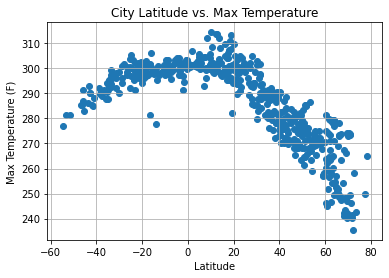

In [10]:
# Create scatter plot of Latitude vs. Temperature Plot

plt.scatter(clean_data['Lat'], clean_data['Max Temp'])
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()


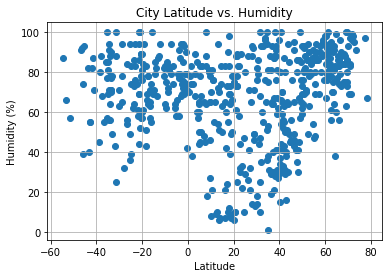

In [11]:
# Latitude vs. Humidity Plot

plt.scatter(clean_data['Lat'], clean_data['Humidity'])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout
plt.savefig("City Latitude vs. Humidity.png")
plt.show()


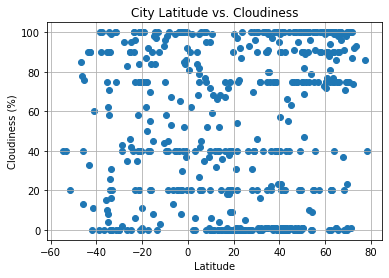

In [12]:
# Latitude vs. Cloudiness Plot

plt.scatter(clean_data['Lat'], clean_data['Cloudiness'])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()


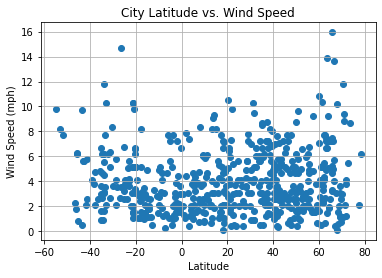

In [13]:
# Latitude vs. Wind Speed Plot

plt.scatter(clean_data['Lat'], clean_data['Wind Speed'])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()


# Linear Regression

In [14]:
# Seperate data into northern and southern hemp
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
# Southern Hemisphere (less than 0 degrees latitude)

north_hemp = clean_data.loc[clean_data['Lat'] >= 0]

south_hemp = clean_data.loc[clean_data['Lat'] < 0]


The r-value is -0.89
There is a strong negative correlation between Latitude and Max Temp in the Northern Hemisphere


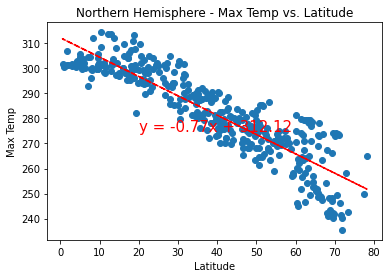

In [15]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(north_hemp['Lat'], north_hemp['Max Temp'])[0],2)}")
print(f"There is a strong negative correlation between Latitude and Max Temp in the Northern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemp['Lat'], north_hemp['Max Temp'])
regress_values = north_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(north_hemp['Lat'], north_hemp['Max Temp'])
plt.plot(north_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (20, 275), fontsize=15, color='red')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()


The r-value is 0.68
There is a strong positive correlation between Latitude and Max Temp in the Southern Hemisphere


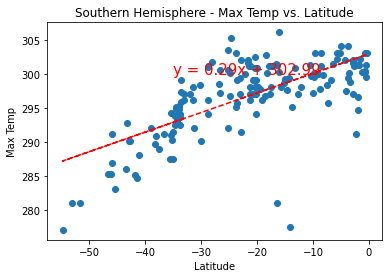

In [16]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(south_hemp['Lat'], south_hemp['Max Temp'])[0],2)}")
print(f"There is a strong positive correlation between Latitude and Max Temp in the Southern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemp['Lat'], south_hemp['Max Temp'])
regress_values = south_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(south_hemp['Lat'], south_hemp['Max Temp'])
plt.plot(south_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (-35, 300), fontsize=15, color='red')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()


The r-value is 0.37
There is a positive correlation between Latitude and Humidity in the Northern Hemisphere


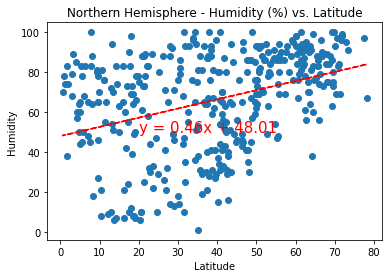

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(north_hemp['Lat'], north_hemp['Humidity'])[0],2)}")
print(f"There is a positive correlation between Latitude and Humidity in the Northern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemp['Lat'], north_hemp['Humidity'])
regress_values = north_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(north_hemp['Lat'], north_hemp['Humidity'])
plt.plot(north_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (20, 50), fontsize=15, color='red')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()


The r-value is 0.11
There is a positive correlation between Latitude and Humidity in the Southern Hemisphere


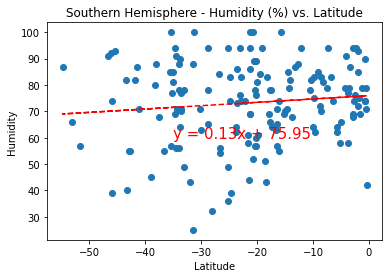

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(south_hemp['Lat'], south_hemp['Humidity'])[0],2)}")
print(f"There is a positive correlation between Latitude and Humidity in the Southern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemp['Lat'], south_hemp['Humidity'])
regress_values = south_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(south_hemp['Lat'], south_hemp['Humidity'])
plt.plot(south_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (-35, 60), fontsize=15, color='red')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()


The r-value is 0.29
There is a positive correlation between Latitude and Cloudiness in the Northern Hemisphere


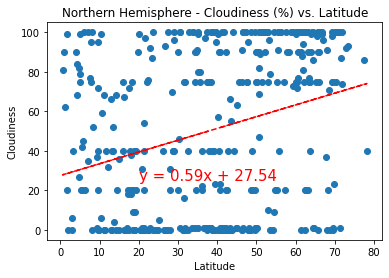

In [19]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(north_hemp['Lat'], north_hemp['Cloudiness'])[0],2)}")
print(f"There is a positive correlation between Latitude and Cloudiness in the Northern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemp['Lat'], north_hemp['Cloudiness'])
regress_values = north_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(north_hemp['Lat'], north_hemp['Cloudiness'])
plt.plot(north_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (20, 25), fontsize=15, color='red')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()


The r-value is 0.14
There is a positive correlation between Latitude and Cloudiness in the Southern Hemisphere


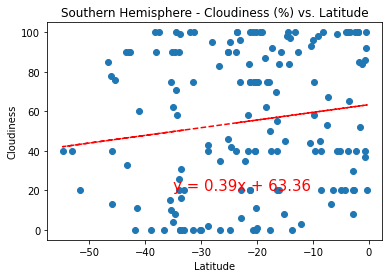

In [20]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(south_hemp['Lat'], south_hemp['Cloudiness'])[0],2)}")
print(f"There is a positive correlation between Latitude and Cloudiness in the Southern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemp['Lat'], south_hemp['Cloudiness'])
regress_values = south_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(south_hemp['Lat'], south_hemp['Cloudiness'])
plt.plot(south_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (-35, 20), fontsize=15, color='red')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()


The r-value is 0.13
There is a positive correlation between Latitude and Wind Speed in the Northern Hemisphere


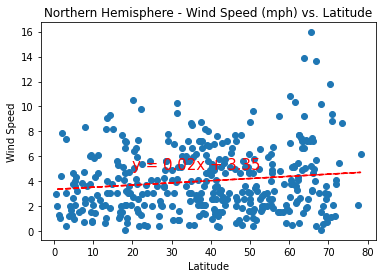

In [21]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(north_hemp['Lat'], north_hemp['Wind Speed'])[0],2)}")
print(f"There is a positive correlation between Latitude and Wind Speed in the Northern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemp['Lat'], north_hemp['Wind Speed'])
regress_values = north_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(north_hemp['Lat'], north_hemp['Wind Speed'])
plt.plot(north_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (20, 5), fontsize=15, color='red')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()


The r-value is -0.28
There is a negative correlation between Latitude and Wind Speed in the Southern Hemisphere


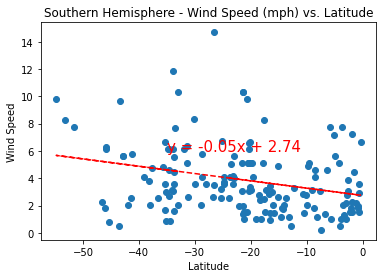

In [22]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

print(f"The r-value is {round(st.pearsonr(south_hemp['Lat'], south_hemp['Wind Speed'])[0],2)}")
print(f"There is a negative correlation between Latitude and Wind Speed in the Southern Hemisphere")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemp['Lat'], south_hemp['Wind Speed'])
regress_values = south_hemp['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(south_hemp['Lat'], south_hemp['Wind Speed'])
plt.plot(south_hemp['Lat'], regress_values, 'r--')
plt.annotate(line_eq, (-35, 6), fontsize=15, color='red')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()


# Observations

Here are 3 observations as seen from the data:

1. The closer a city is to the equator, the highter the max tmep (as shown in latitude vs max temp plot)

2. In the northern hempishere there is a positive relationship between a city's location and the wind speed, with r value = 0.13

3. There is a strong negative relationsip between latitude and max temp in the northern hempishere, the further you are from the equator the colder it gets